## Vehical Prediction Project

In [1]:
import os
os.chdir("C:/Users/Pooja Kathe/Downloads/VehiclePerformancePrediction/Vehicle Performance Prediction/Dataset")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [6]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [7]:
df.shape

(398, 9)

In [8]:
df.describe(include="object")

,horsepower,name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [9]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [10]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


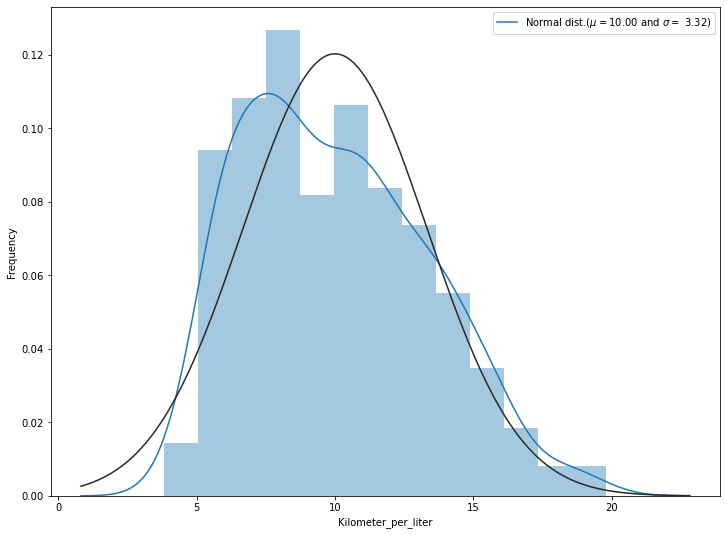

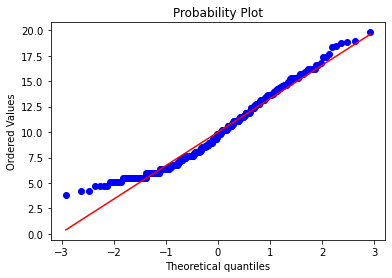

In [11]:
plt.subplots(figsize=(12,9))
sns.distplot(df["Kilometer_per_liter"],fit=stats.norm)

## get the fitted paramter used by the function 
(mu,sigma)=stats.norm.fit(df["Kilometer_per_liter"])

## plot dist 
plt.legend(['Normal dist.($\mu= ${:.2f} and $\sigma= $ {:.2f})'.format(mu,sigma)],loc="best")
plt.ylabel("Frequency")

## probabity plot
fig=plt.figure()
stats.probplot(df["Kilometer_per_liter"],plot=plt)
plt.show()

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


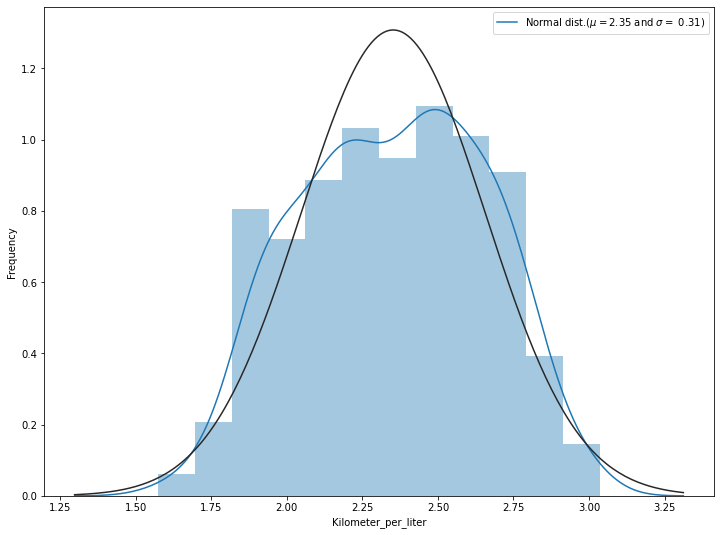

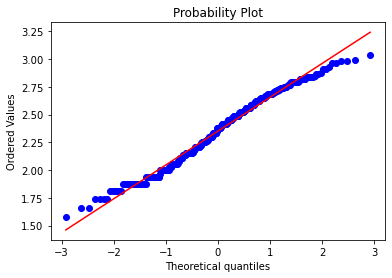

In [12]:
## we use log which is a part of numpy library
df["Kilometer_per_liter"]=np.log1p(df["Kilometer_per_liter"])

## check againe for normal distribution 
plt.subplots(figsize=(12,9))
sns.distplot(df["Kilometer_per_liter"],fit=stats.norm)

## get the fitted paramter used by the function 
(mu,sigma)=stats.norm.fit(df["Kilometer_per_liter"])

## plot  with the distribution 
plt.legend(['Normal dist.($\mu= ${:.2f} and $\sigma= $ {:.2f})'.format(mu,sigma)],loc="best")
plt.ylabel("Frequency")

## probabity plot
fig=plt.figure()
stats.probplot(df["Kilometer_per_liter"],plot=plt)
plt.show()

### Exploratory Analysis

In [13]:
## lets check the missing  dta if any
df.columns[df.isnull().any()]

Index([], dtype='object')

In [14]:
df.replace("?",np.nan,inplace=True)  #inplace= true then change  store in exsiting file

In [15]:
avg=df["horsepower"].astype("float").mean(axis=0)

In [16]:
avg

104.46938775510205

In [17]:
df["horsepower"].replace(np.nan,avg,inplace=True)

In [18]:
df["horsepower"].dtype

dtype('O')

In [19]:
df.horsepower=df.horsepower.astype("float")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [21]:
train_cat=df.select_dtypes(include="object").columns ## septing catrgorical variable


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
## label encoding categorical variable
for c in train_cat:
    lbl=LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c]=lbl.transform(list(df[c].values))

In [24]:
df.shape

(398, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    int64  
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


<AxesSubplot:>

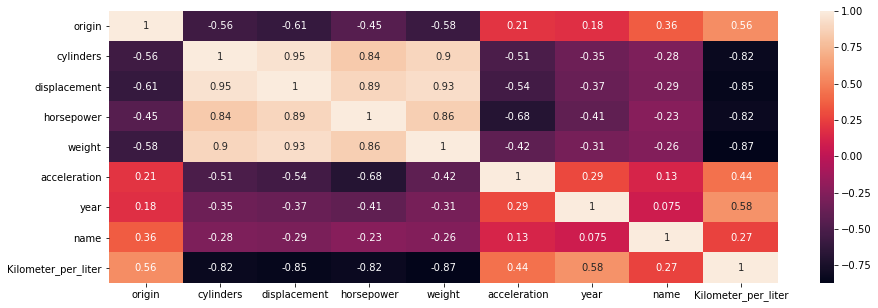

In [26]:
corr1=df.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corr1,annot=True)

### Simple LR

In [27]:
y=df["Kilometer_per_liter"]
X=df[['origin', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'name']]

In [28]:
lm=LinearRegression()

In [29]:
lm.fit(X,y) ## fit the model

LinearRegression()

In [30]:
lm

LinearRegression()

In [31]:
yhat=lm.predict(X)

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,yhat)
r_squared=r2_score(y,yhat)

In [33]:
from math import sqrt
rmse=sqrt(mse)

In [34]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 0.011477552357723415
root_mean_squared_error: 0.10713333915137442
r_squard_value 0.876723133369915


## Std Scaling 

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scale=StandardScaler()

In [37]:
x_sc=scale.fit_transform(X)


In [38]:
lm_sc=lm.fit(x_sc,y)

In [39]:
yhat_sc=lm.predict(x_sc)

In [40]:
yhat_sc[0:4]

array([2.01003931, 1.95138464, 2.03241223, 2.00118823])

In [41]:
y[0:4]

0    2.157858
1    1.998388
2    2.157858
3    2.054418
Name: Kilometer_per_liter, dtype: float64

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,yhat_sc)
r_squared=r2_score(y,yhat_sc)

In [43]:
from math import sqrt
rmse=sqrt(mse)

In [44]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 0.011477552357723448
root_mean_squared_error: 0.10713333915137457
r_squard_value 0.8767231333699147


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


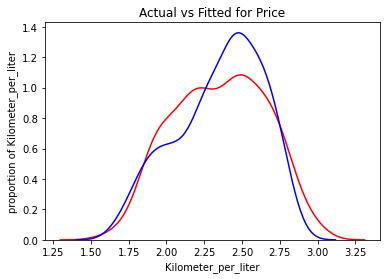

In [45]:
ax1=sns.distplot(df["Kilometer_per_liter"],hist=False,color="r",label="Actual Values")
sns.distplot(yhat_sc,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Kilometer_per_liter")
plt.ylabel("proportion of Kilometer_per_liter")
plt.show()

## LR with train test split

In [46]:
## take the values as X and Y
X=X.values
y=y.values

In [47]:
## split data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [48]:
model=LinearRegression()

In [49]:
model.fit(X_train,y_train)

LinearRegression()

In [50]:
## prediction for a single data point
yhat_t=model.predict(X_test)

In [51]:
yhat_t[0:4]

array([2.50447286, 2.52496553, 2.68437113, 2.44667094])

In [52]:
y_test[0:4]

array([2.48937469, 2.33729194, 2.75699824, 2.62135232])

In [53]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,yhat_t)
r_squared=r2_score(y_test,yhat_t)

In [54]:
from math import sqrt
rmse=sqrt(mse)

In [55]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 0.014906773179221178
root_mean_squared_error: 0.1220932970282201
r_squard_value 0.8027439456694647


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


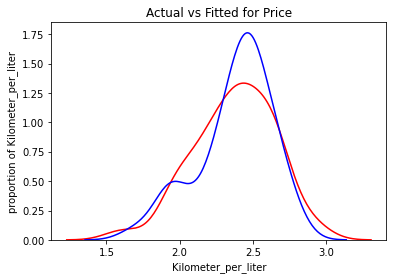

In [56]:
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Values")
sns.distplot(yhat_t,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Kilometer_per_liter")
plt.ylabel("proportion of Kilometer_per_liter")
plt.show()

## Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures


In [58]:
pr=PolynomialFeatures(degree=2)

In [59]:
X_train_pr=pr.fit_transform(X_train)

In [60]:
X_test_pr=pr.fit_transform(X_test)

In [61]:
model_pr=model.fit(X_train_pr,y_train)

In [62]:
pred_val1=model.predict(X_test_pr)

In [63]:
pred_val1[0:5]

array([2.58295434, 2.55124573, 2.76070595, 2.56720873, 2.82343463])

In [64]:
y_test[0:5]

array([2.48937469, 2.33729194, 2.75699824, 2.62135232, 2.61515116])

In [65]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred_val1)
r_squared=r2_score(y_test,pred_val1)

In [66]:
from math import sqrt
rmse=sqrt(mse)

In [67]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 0.036652073384101334
root_mean_squared_error: 0.19144731229270714
r_squard_value 0.514996083199356


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


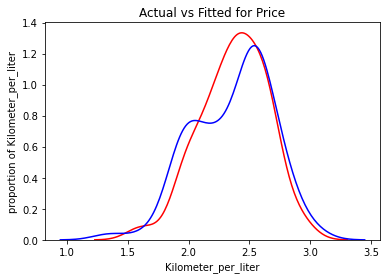

In [68]:
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Values")
sns.distplot(pred_val1,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Kilometer_per_liter")
plt.ylabel("proportion of Kilometer_per_liter")
plt.show()

## Cross validation on linear R 

In [69]:
model.fit(X_train,y_train)

LinearRegression()

In [70]:
model.score(X_train,y_train)

0.8899060231054483

In [71]:
model.score(X_test,y_test)

0.8027439456694647

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
Rcross=cross_val_score(model,X_train,y_train,cv=4)

In [74]:
Rcross

array([0.88255407, 0.89784933, 0.86090471, 0.89979232])

## Ridge Regression

In [75]:
from sklearn.linear_model import Ridge

In [76]:
RidgeModel=Ridge(alpha=0.1)

In [77]:
RidgeModel.fit(X_train,y_train)

Ridge(alpha=0.1)

In [78]:
yhat_Ridge=RidgeModel.predict(X_test)

In [79]:
print("predicted",yhat_Ridge[0:4])

predicted [2.50445398 2.52498073 2.68439501 2.44668166]


In [80]:
print("actual values",y_test[0:4])

actual values [2.48937469 2.33729194 2.75699824 2.62135232]


In [81]:
### r-score for test split
Rcross2=cross_val_score(RidgeModel,X_test,y_test,cv=4)

In [82]:
Rcross2

array([0.74714993, 0.81295565, 0.63676673, 0.7580223 ])

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


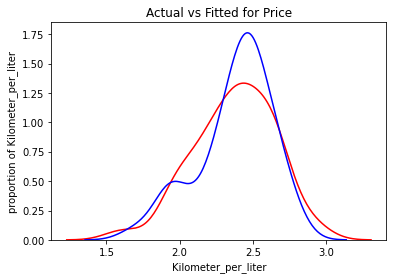

In [83]:
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Values")
sns.distplot(yhat_Ridge,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Kilometer_per_liter")
plt.ylabel("proportion of Kilometer_per_liter")
plt.show()

In [84]:
### r-score for train split
Rcross3=cross_val_score(RidgeModel,X_train,y_train,cv=4)

In [85]:
Rcross3

array([0.88258077, 0.89784014, 0.86090179, 0.89979439])

## Grid Search for Hyperparameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameter1=[{"alpha":[0.001,0.1,1,10,100,1000,10000,100000]}]

In [88]:
RR=Ridge()

In [89]:
RR

Ridge()

In [90]:
Grid1=GridSearchCV(RR,parameter1, cv=4)

In [91]:
## Grid regression for simple linear regression
Grid1.fit(X,y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [92]:
BestRR=Grid1.best_estimator_

In [93]:
BestRR

Ridge(alpha=0.001)

In [94]:
BestRR.score(X,y)

0.8767231333695299

In [95]:
## Grid regression for Test data
Grid1.fit(X_test,y_test)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [96]:
BestRR=Grid1.best_estimator_

In [97]:
BestRR

Ridge(alpha=100)

In [98]:
BestRR.score(X_test,y_test)

0.8248213555007844